In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [15]:
# Image dimensions
img_width, img_height = 150, 150

In [16]:
# Path to the main directory
train_data_dir='/content/drive/MyDrive/google collllab/Ball Dataset/Ball_train'
test_data_dir='/content/drive/MyDrive/google collllab/Ball Dataset/Ball_test'

In [17]:
datagen=ImageDataGenerator(rescale=1. /255,validation_split=0.2)

In [18]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='categorical'
    )

validation_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='categorical'
    )


Found 3064 images belonging to 6 classes.
Found 779 images belonging to 6 classes.


In [19]:
#CNN MODEL:

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(img_width,img_height,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(6, activation='softmax'))


In [20]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/5
47/47 [==============================] - 112s 2s/step - loss: 1.7862 - accuracy: 0.2707 - val_loss: 1.6310 - val_accuracy: 0.3047
Epoch 2/5
47/47 [==============================] - 121s 3s/step - loss: 1.5009 - accuracy: 0.4027 - val_loss: 1.4681 - val_accuracy: 0.4141
Epoch 3/5
47/47 [==============================] - 111s 2s/step - loss: 1.2623 - accuracy: 0.5270 - val_loss: 1.3099 - val_accuracy: 0.5273
Epoch 4/5
47/47 [==============================] - 136s 3s/step - loss: 0.9801 - accuracy: 0.6500 - val_loss: 1.2981 - val_accuracy: 0.5312
Epoch 5/5
47/47 [==============================] - 125s 3s/step - loss: 0.7103 - accuracy: 0.7557 - val_loss: 1.2666 - val_accuracy: 0.5664


In [22]:
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]}")

Final validation accuracy: 0.56640625


In [26]:
import numpy as np
from keras.preprocessing import image

# Function to predict a single image
def predict_single_image(model, image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    classes = ['american football', 'basebal', 'cricket ball','golf ball','hockey ball','table tennis']
    print(f"Prediction: {classes[predicted_class]} - Raw output: {prediction[0]}")

# Predict single image
predict_single_image(model, '/content/drive/MyDrive/google collllab/Ball Dataset/Ball_train/cricket_ball/cricket_ball_100.jpg')


1/1 [==============================] - 0s 31ms/step
Prediction: cricket ball - Raw output: [6.58115894e-02 2.23764437e-05 8.14439654e-01 1.68101571e-04
 1.19253546e-01 3.04789428e-04]


13/13 [==============================] - 12s 886ms/step


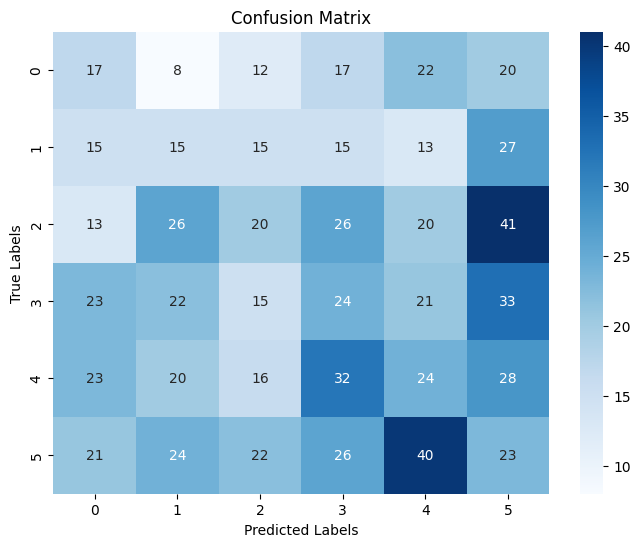

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def get_predictions(model, generator):
    y_true = generator.classes
    y_pred = np.argmax(model.predict(generator), axis=-1)
    return y_true, y_pred

# Get predictions for the validation set
y_true, y_pred = get_predictions(model, validation_generator)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()